# K-MEANS

In [1]:
#importo qui tutte le librerie
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.cluster.hierarchy as shc

from pandas.plotting import scatter_matrix
from matplotlib import cm
from scipy.stats import mode
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from pandas.plotting import scatter_matrix
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
#questo serve per colab

#from google.colab import drive
#drive.mount('/content/drive')
#directory = '/content/drive/My Drive/DATA_MINING/'

In [4]:
#importo il dataset normalizzato
df = pd.read_csv("csv/ds_per_clustering.csv")
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0.809524,No,1.0,0.351719,Research & Development,0.285714,4,Medical,2,...,3.0,3,0,0.540541,0.333333,2,0.200,0.411765,0.133333,0.764706
1,1,0.428571,No,1.0,0.799427,Research & Development,0.000000,1,Life Sciences,2,...,3.0,3,1,0.567568,0.500000,3,0.025,0.470588,0.066667,0.352941
2,2,0.434286,No,2.0,0.306590,Sales,0.535714,3,Life Sciences,3,...,3.0,3,1,0.189189,0.666667,3,0.025,0.294118,0.066667,0.117647
3,3,0.357143,No,1.0,0.609599,Research & Development,0.142857,4,Technical Degree,2,...,3.0,2,0,0.324324,0.166667,3,0.075,0.411765,0.000000,0.411765
4,4,0.442034,No,1.0,0.915473,Research & Development,0.285714,2,Life Sciences,3,...,3.0,3,0,0.054054,0.423580,3,0.250,0.117647,0.133333,0.058824


In [5]:
#importo il dataset denormalizzato
df_den = pd.read_csv("csv/ds_denormalizzato.csv")
df_den.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,52.000000,No,1.0,593.0,Research & Development,9.0,4,Medical,2,...,3.0,3,0,20.0,2.000000,2,8.0,7.0,2.0,13.0
1,1,36.000000,No,1.0,1218.0,Research & Development,1.0,1,Life Sciences,2,...,3.0,3,1,21.0,3.000000,3,1.0,8.0,1.0,6.0
2,2,36.239998,No,2.0,530.0,Sales,16.0,3,Life Sciences,3,...,3.0,3,1,7.0,4.000000,3,1.0,5.0,1.0,2.0
3,3,33.000000,No,1.0,953.0,Research & Development,5.0,4,Technical Degree,2,...,3.0,2,0,12.0,1.000000,3,3.0,7.0,0.0,7.0
4,4,36.565412,No,1.0,1380.0,Research & Development,9.0,2,Life Sciences,3,...,3.0,3,0,2.0,2.541481,3,10.0,2.0,2.0,1.0


## DATASET CON 14 VAR

The dataset used for the clustering analysis is the one obtained from the Data Understanding process (see section n), which contains continuous attributes already normalised with the MinMax method and without all the missing values replaced in the Assessing Data Quality part (see section n).
The first step of this study is expressed by the application of the K-Means method, while the second one by running the Density-Based algorithm, so that we can ultimately evaluate which is the best technique for clustering this kind of dataset. 
In contemplation of getting results as accurate as possible from the analysis, the dataset has been firstly reduced from the total number of attributes to only the numerical ones, then to 6 and eventually to 4 attributes. However, we choose to mention in this report only the first and the last observation to stress clearly the difference between the beginning and the end of the clustring process improvement, without illustrating all the amount of experiments carried out.
At each step, we compute the sum of squared error (SSE) and the Silhouette Coefficient to evaluate the clustering analysis: thanks to a plot that shows the SSE in relation to the number of clusters used, we notice that the clustering indeed gets more precise and it is possible to see which is the best number of clusters for the dataset to be divided into.

In [6]:
df_copia = df.copy()

In [7]:
#variabili da droppare dal dataset
to_discard = ['Unnamed: 0', 'Attrition', 'BusinessTravel', 'Department', 'WorkLifeBalance', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorklifeBalance']

#creo il dataset df_k_means2, che non contiene le variabili della lista to_discard su cui applicare l'algoritmo di KMeans
to_df = [col for col in df_copia.columns if col not in to_discard]
df_14var = df_copia[to_df]
df_14var.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.809524,0.351719,0.285714,0.828571,0.391627,0.469239,1.000000,0.428571,0.540541,0.333333,0.200,0.411765,0.133333,0.764706
1,0.428571,0.799427,0.000000,0.314286,0.201422,0.245603,0.111111,0.214286,0.567568,0.500000,0.025,0.470588,0.066667,0.352941
2,0.434286,0.306590,0.535714,0.085714,0.197946,0.563529,0.111111,1.000000,0.189189,0.666667,0.025,0.294118,0.066667,0.117647
3,0.357143,0.609599,0.142857,0.500000,0.094260,0.625532,0.222222,0.214286,0.324324,0.166667,0.075,0.411765,0.000000,0.411765
4,0.442034,0.915473,0.285714,0.642857,0.366983,0.169545,0.111111,0.071429,0.054054,0.423580,0.250,0.117647,0.133333,0.058824


In [8]:
#trasformo df_k_means in una matrice di array numpy chiamata matrix
matrix_14var = df_14var.to_numpy()
matrix_14var

array([[0.80952381, 0.3517192 , 0.28571429, ..., 0.41176471, 0.13333333,
        0.76470588],
       [0.42857143, 0.79942693, 0.        , ..., 0.47058824, 0.06666667,
        0.35294118],
       [0.43428566, 0.30659026, 0.53571429, ..., 0.29411765, 0.06666667,
        0.11764706],
       ...,
       [0.35714286, 0.34455587, 0.10714286, ..., 0.11764706, 0.        ,
        0.17647059],
       [0.64285714, 0.76790831, 0.07142857, ..., 0.23529412, 0.        ,
        0.05882353],
       [0.71428571, 0.95200573, 0.46428571, ..., 0.        , 0.        ,
        0.        ]])

### APPLICO K-MEANS CON n_clusters=3 e n_init=20

As mentioned before, the first method applied is the K-Means algorithm, a simple clustering technique which is useful to divide the dataset into subsets of homogeneous data. 
In the first step, we turn the dataset with 14 continuous attributes into a matrix of numpy arrays. Then, we import the sklearn library in order to use its module cluster, which is really helpful for this kind of operation. At this point, we run the K-Means algorithm to find 3 clusters with 100 as maximum number of iterations for a single run and, eventually, we compute the clustering using the fit method. The scatterplot in figure n illustrates the three clusters of DistanceFromHome and YearsSinceLastPromotion variables, found by the K-Means algorithm.

In [9]:
#'n_clusters' di default dovrebbe essere = 8
#'n_init' = number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia
#'max_iter' = maximum number of iterations of the k-means algorithm for a single run
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=100)

#metodo fit(X[, y, sample_weight]) = compute k-means clustering
kmeans.fit(matrix_14var)

KMeans(max_iter=100, n_clusters=3, n_init=20)

In [10]:
len(kmeans.cluster_centers_) #numero di centroidi

3

In [11]:
kmeans.cluster_centers_ #li visualizzo

array([[0.47942555, 0.52754859, 0.73508319, 0.5346529 , 0.31016434,
        0.52536771, 0.27933958, 0.28915663, 0.2754803 , 0.47259232,
        0.20375682, 0.20741791, 0.10040161, 0.19395228],
       [0.4942494 , 0.47959421, 0.19473938, 0.44092664, 0.30306551,
        0.49974902, 0.23423423, 0.2726834 , 0.41928415, 0.46668058,
        0.19494352, 0.4759539 , 0.30472973, 0.46383148],
       [0.44063825, 0.50308516, 0.14877803, 0.54761905, 0.26792303,
        0.48601821, 0.33098178, 0.31103553, 0.22050622, 0.46989444,
        0.15992879, 0.11650586, 0.04550265, 0.11909949]])

In [12]:
#kmeans.cluster_centers_

In [13]:
kmeans.labels_

array([1, 1, 0, ..., 2, 2, 0], dtype=int32)

In [14]:
#creazione di un dizionario con il numero di elementi per cluster?
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 249, 1: 296, 2: 567}

#### ScatterPlots per vedere i clusters su coppie di variabili scelte

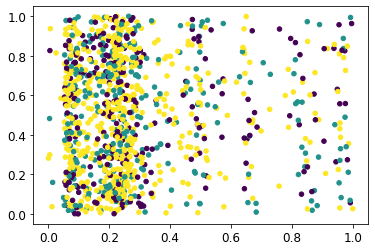

In [15]:
#scatterplot con i clusters di MonthlyIncome e MonthlyRate
plt.scatter(df_14var['MonthlyIncome'], df_14var['MonthlyRate'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Terrible.

In [16]:
centers = kmeans.cluster_centers_
centers

array([[0.47942555, 0.52754859, 0.73508319, 0.5346529 , 0.31016434,
        0.52536771, 0.27933958, 0.28915663, 0.2754803 , 0.47259232,
        0.20375682, 0.20741791, 0.10040161, 0.19395228],
       [0.4942494 , 0.47959421, 0.19473938, 0.44092664, 0.30306551,
        0.49974902, 0.23423423, 0.2726834 , 0.41928415, 0.46668058,
        0.19494352, 0.4759539 , 0.30472973, 0.46383148],
       [0.44063825, 0.50308516, 0.14877803, 0.54761905, 0.26792303,
        0.48601821, 0.33098178, 0.31103553, 0.22050622, 0.46989444,
        0.15992879, 0.11650586, 0.04550265, 0.11909949]])

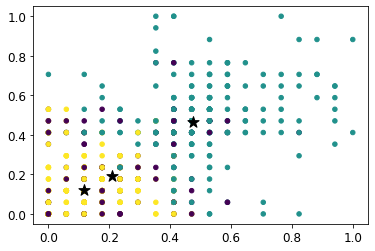

In [17]:
#scatterplot con i clusters di YearsWithCurrManager e YearsInCurrentRole
plt.scatter(df_14var['YearsInCurrentRole'], df_14var['YearsWithCurrManager'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 11], centers[:, 13], s=140, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

The two clusters which are close to each other are too noisy, I don't like it.

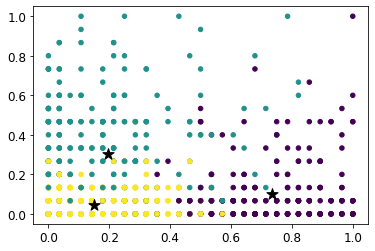

In [18]:
#scatterplot con i clusters di DistanceFromHome e YearsSinceLastPromotion
plt.scatter(df_14var['DistanceFromHome'], df_14var['YearsSinceLastPromotion'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 2], centers[:, 12], s=140, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

This is the scatterplot used to see the 3 clusters after running the K-Means algorithm: it's cute!

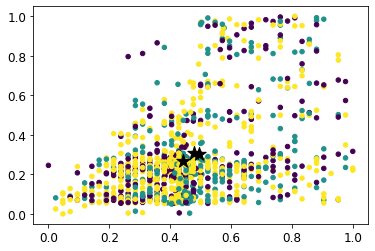

In [19]:
#scatterplot con i clusters di Age e MonthlyIncome
plt.scatter(df_14var['Age'], df_14var['MonthlyIncome'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Nope, don't like it.

In [20]:
#ARIA: non lo runno perché non mi serve.
#creazione della matrice con tutti gli scatterplot

#scatter_matrix = scatter_matrix(df_14var, figsize=(100, 100), c=kmeans.labels_, s=900)

#for ax in scatter_matrix.ravel():
 #   ax.set_xlabel(ax.get_xlabel(), fontsize = 35)
 #   ax.set_ylabel(ax.get_ylabel(), fontsize = 35)
#plt.show()

K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.
One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Like this:

Fonte: https://bl.ocks.org/rpgove/0060ff3b656618e9136b

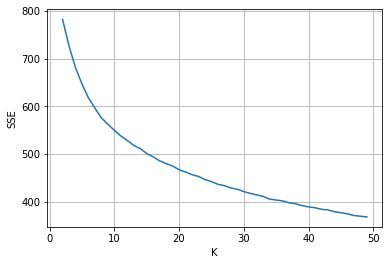

In [21]:
#creazione della curva nel grafico che visualizza SSE (y) e clusters (x)
#Using the elbow method to determine the optimal number of clusters for k-means clustering
sse_list = list()
max_k = 50

for k in range(2, max_k):
    kmeansplot = KMeans(init='k-means++', n_clusters=k, n_init=50, max_iter=100)
    kmeansplot.fit(df_14var)
    sse = kmeansplot.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.grid(True)
plt.show()

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [22]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(df_14var, kmeans.labels_))

labels {0: 249, 1: 296, 2: 567}
sse 726.3301608155208
silhouette 0.10641643130252768


The results are not satisfying, because the SSE is too high and the “elbow” is not as clear as we hoped. We can see though that the SSE has a tendency to decrease toward 0 as we increase k, because the SSE is 0 when k is equal to the number of data points in the dataset (NB: To compute the sum of squared error, we calculate the error of each data point, its Euclidean distance to the closest centroid and then compute the total sum of the squared errors, fonte: libro). Indeed, we prefer a clustering analysis with the smallest SSE, since this indicates that the centroids of the clustering are a better representation of the data points in their subset.

The Silhouette Coefficient is a value that can vary between -1 and 1  and we are looking for a positive one. In this case, it is approximately equal to 0.1, which is not sufficient at all. 
At this stage, instead of choosing a higher number of k, we try to reduce again the number of attributes in the dataset to 6 and then again to 4, and we find out that the quality actually increases. To select the 4 variables from the dataset, we create a plot to visualise more vividly the difference among the centroids of each attribute.

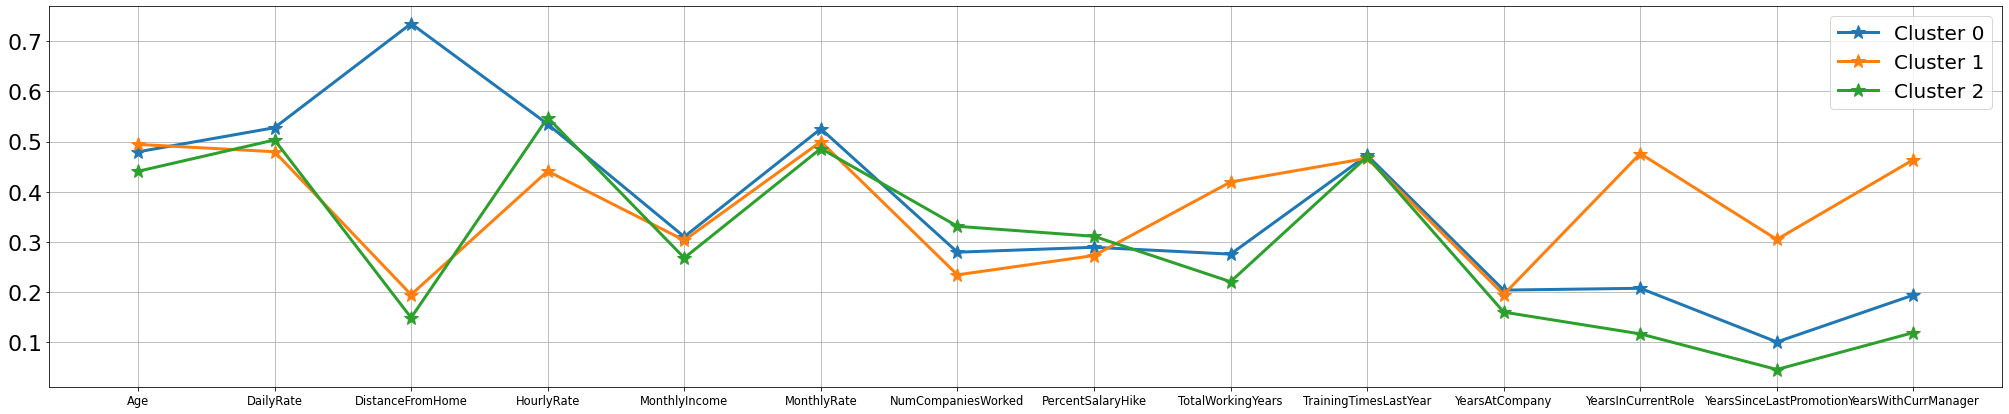

In [23]:
#creo il grafico per visualizzare i centroidi dei clusters di ciascuna delle var
centers = kmeans.cluster_centers_
plt.figure(figsize=(35, 7))
#ARIA: ho cambiato il marker in *, inserito la linewidth per inspessire le linee
#markersize per ingrandire i marker e plt.grid(True) per la griglia

for i in range(0, len(centers)):
    plt.plot(centers[i], marker='*', label='Cluster %s' % i, linewidth = 3, markersize=15)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_14var.columns)), df_14var.columns, fontsize=11.5)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

I try with a higher k:

In [24]:
#'n_clusters' di default dovrebbe essere = 8
#'n_init' = number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia
#'max_iter' = maximum number of iterations of the k-means algorithm for a single run
kmeansK = KMeans(n_clusters=12, n_init=20, max_iter=100)

#metodo fit(X[, y, sample_weight]) = compute k-means clustering
kmeansK.fit(matrix_14var)

KMeans(max_iter=100, n_clusters=12, n_init=20)

In [25]:
hist, bins = np.histogram(kmeansK.labels_, bins=range(0, len(set(kmeansK.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeansK.inertia_)
print ('silhouette', silhouette_score(df_14var, kmeansK.labels_))

labels {0: 89, 1: 89, 2: 118, 3: 77, 4: 135, 5: 75, 6: 82, 7: 77, 8: 82, 9: 78, 10: 96, 11: 114}
sse 530.1456300929161
silhouette 0.07573943658099114


I don't like the result: I should use a k too high, so I try to reduce the dataset. 

## DATASET CON 6 VAR

### APPLICO K-MEANS CON n_clusters=3 e n_init=20

I won't put this part into the report: I will skip directly to the clustering on the dataset with 4 vars.

In [26]:
#Secondo dataframe con solo 6 variabili
df_6var= df_14var.copy()
todrop=["Age","DailyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
        "PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear"]

to_df = [col for col in df_6var.columns if col not in todrop]
df_6var = df[to_df]
df_6var.head()

,DistanceFromHome,HourlyRate,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.285714,0.828571,0.200,0.411765,0.133333,0.764706
1,0.000000,0.314286,0.025,0.470588,0.066667,0.352941
2,0.535714,0.085714,0.025,0.294118,0.066667,0.117647
3,0.142857,0.500000,0.075,0.411765,0.000000,0.411765
4,0.285714,0.642857,0.250,0.117647,0.133333,0.058824


In [27]:
#trasformo df_k_means_6var in una matrice di array numpy chiamata matrix6var
matrix_6var = df_6var.values
matrix_6var

array([[0.28571429, 0.82857143, 0.2       , 0.41176471, 0.13333333,
        0.76470588],
       [0.        , 0.31428571, 0.025     , 0.47058824, 0.06666667,
        0.35294118],
       [0.53571429, 0.08571429, 0.025     , 0.29411765, 0.06666667,
        0.11764706],
       ...,
       [0.10714286, 0.81428571, 0.075     , 0.11764706, 0.        ,
        0.17647059],
       [0.07142857, 0.98571429, 0.25      , 0.23529412, 0.        ,
        0.05882353],
       [0.46428571, 0.04285714, 0.55      , 0.        , 0.        ,
        0.        ]])

In [28]:
#creo un'altra var kmeans per il cluster su questa nuova matrice
kmeans6var = KMeans(n_clusters= 3, n_init= 20, max_iter=100)
kmeans6var.fit(matrix_6var)

KMeans(max_iter=100, n_clusters=3, n_init=20)

In [29]:
#ARIA: non lo runno perché non mi serve e ci impiega troppo tempo
#creazione della curva nel grafico che visualizza SSE (y) e clusters (x)
#Using the elbow method to determine the optimal number of clusters for k-means clustering

#sse_list6var = list()
#max_k = 50

#for k in range(2,max_k):
 #   kmeans6varplot = KMeans(init='k-means++', n_clusters=k, n_init=50, max_iter=100)
 #   kmeans6varplot.fit(df_6var)
 #   sse6var = kmeans6varplot.inertia_
 #   sse_list6var.append(sse6var)
#plt.plot(range(2,max_k), sse_list6var)
#plt.plot(9, 119, 'ro') #ARIA: per segnare il punto in cui la curva si rialza. Se non piace o è impreciso si toglie!
#plt.ylabel('SSE')
#plt.xlabel('K')
#plt.grid(True)
#plt.show()

#La curva del SSE è migliorata con il dataset con 6 var 
#il "gomito" si aggira intorno a SSE=124 e k=10 (dove k è il num di clusters)

In [30]:
hist6var, bins6var = np.histogram(kmeans6var.labels_, bins=range(0, len(set(kmeans6var.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins6var, hist6var)))
print ('sse', kmeans6var.inertia_)
print ('silhouette', silhouette_score(df_6var, kmeans6var.labels_))

#I valori della SSE e della Silhouette sono ancora migliorati.

labels {0: 291, 1: 569, 2: 252}
sse 211.61946632561464
silhouette 0.26826847612304


In [31]:
#ARIA: non lo runno perché non mi serve e ci impiega troppo tempo
#creazione di un'altra matrice con gli scatterplot delle 6 variabili

#scatter_matrix_6var = scatter_matrix(df_6var, figsize=(70, 70), c=kmeans6var.labels_, s=1500)

#for ax in scatter_matrix_6var.ravel():
 #   ax.set_xlabel(ax.get_xlabel(), fontsize = 38)
 #   ax.set_ylabel(ax.get_ylabel(), fontsize = 38)

#plt.show()

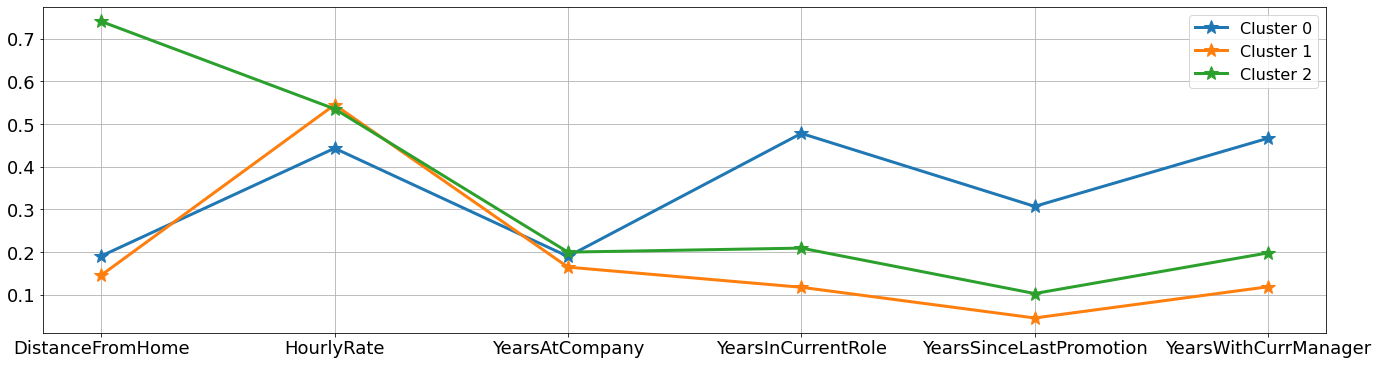

In [32]:
#creo il grafico per visualizzare i centroidi dei clusters di ciascuna delle 6 var

centers6var = kmeans6var.cluster_centers_
plt.figure(figsize=(23, 6))

for i in range(0, len(centers6var)):
    plt.plot(centers6var[i], marker='*', label='Cluster %s' % i, linewidth = 3, markersize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(range(0, len(df_6var.columns)), df_6var.columns, fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

## DATASET CON 4 VAR

In [2]:
#Terzo dataframe df_k_means_4var con solo 4 variabili
df_4var = df.copy()
todrop = ["HourlyRate", "YearsAtCompany",'Unnamed: 0', 'Attrition', 'BusinessTravel', 'Department', 'WorkLifeBalance', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorklifeBalance', "Age","DailyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
        "PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear"]

to_df = [col for col in df.columns if col not in todrop]
df_4var = df[to_df]
df_4var.head()

NameError: name 'df' is not defined

### APPLICO K-MEANS CON n_clusters=3 e n_init=20

Depending on the space among the centroids, we suppose that the ones with a greater distance are part of better defined clusters. Therefore, we opt for the attribute DistanceFromHome, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager and we apply once more the K-Means algorithm.

In [6]:
#trasformo df_k_means_4var in una matrice di array numpy chiamata matrix4var
matrix4var=df_4var.values

#applico il kmeans con num clusters = 3
kmeans4var=KMeans(n_clusters= 3, n_init= 20, max_iter=100)
kmeans4var.fit(matrix4var)

KMeans(max_iter=100, n_clusters=3, n_init=20)

If we compute again the SSE and the Silhouette Coefficient to estimate how much the clustering has improved, we can observe that it definitely has:

In [7]:
hist4var, bins4var = np.histogram(kmeans4var.labels_, bins=range(0, len(set(kmeans4var.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins4var, hist4var)))
print ('sse', kmeans4var.inertia_)
print ('silhouette', silhouette_score(df_4var, kmeans4var.labels_))

labels {0: 286, 1: 570, 2: 256}
sse 95.66729149771585
silhouette 0.42443233905497607


Considering the elbow method to estimate the point in which the clustering enhances, we can observe that the beginning of the “elbow” can now be located around an SSE value equal to 65 and a number of clusters equal to 5 (see the red point on the line in the next figure)

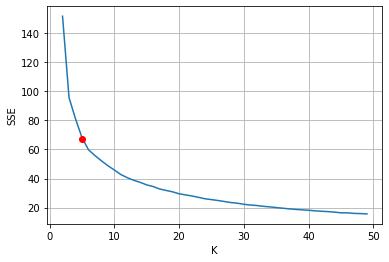

In [36]:
#creazione della curva nel grafico che visualizza SSE (y) e clusters (x)
#Using the elbow method to determine the optimal number of clusters for k-means clustering
sse_list4var = list()
max_k = 50

for k in range(2,max_k):
    kmeans4varplot = KMeans(init='k-means++', n_clusters=k, n_init=50, max_iter=100)
    kmeans4varplot.fit(df_4var)
    sse4var = kmeans4varplot.inertia_
    sse_list4var.append(sse4var)
plt.plot(range(2,max_k), sse_list4var)
plt.plot(5, 67, 'ro') #ARIA: per segnare il punto in cui la curva si rialza. Se non piace si toglie!
plt.ylabel('SSE')
plt.xlabel('K')
plt.grid(True)
plt.show()

#Notiamo che la curva è migliorata nuovamente con il dataset con 4 var: il "gomito" si aggira intorno a k=5.

In [37]:
#ARIA: non lo runno perché non mi serve
#creo il grafico per visualizzare i centroidi dei clusters di ciascuna delle 4 var

#centers4var = kmeans4var.cluster_centers_
#plt.figure(figsize=(15, 4))

#for i in range(0, len(centers4var)):
 #   plt.plot(centers4var[i], marker='*', label='Cluster %s' % i, linewidth = 2, markersize=10)
#plt.tick_params(axis='both', which='major', labelsize=12)
#plt.xticks(range(0, len(df_4var.columns)), df_4var.columns, fontsize=12)
#plt.legend(fontsize=12)
#plt.grid(True)
#plt.show()

Fom now on I start to try different k higher than the previous one, to see which is the best to get the most defined clustering.
The best one is k=5 (personal opinion: Aria)

### APPLICO K-MEANS CON n_clusters=4 e n_init=20 SUL DATASET CON 4 VAR 

In [38]:
#n_clusters 4 con il dataset con 4 variabili
kmeans4var4c = KMeans(n_clusters= 4, n_init= 20, max_iter=100)
kmeans4var4c.fit(matrix4var)

KMeans(max_iter=100, n_clusters=4, n_init=20)

In [39]:
hist4var4c, bins4var4c = np.histogram(kmeans4var4c.labels_, bins=range(0, len(set(kmeans4var4c.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins4var4c, hist4var4c)))
print ('sse', kmeans4var4c.inertia_)
print ('silhouette', silhouette_score(df_4var, kmeans4var4c.labels_))

labels {0: 563, 1: 126, 2: 246, 3: 177}
sse 81.0177541202762
silhouette 0.415189917930173


SSE has not decreased a lot, the silhouette too >> I don't like this result, k is still too low (Aria)

### APPLICO K-MEANS CON n_clusters=5 e n_init=20 SUL DATASET CON 4 VAR

In [8]:
#trasformo df_k_means_4var in una matrice di array numpy chiamata matrix4var
matrix4var=df_4var.values

#n_clusters 5 con il dataset con 4 variabili
kmeans4var5c = KMeans(n_clusters= 5, n_init= 20, max_iter=100)
kmeans4var5c.fit(matrix4var)

KMeans(max_iter=100, n_clusters=5, n_init=20)

In [9]:
#arraydf4var = df_4var.values
#arraydf4var[:5,:]

In [10]:
centers2 = kmeans4var5c.cluster_centers_
centers2 #visualizzo i centroidi

array([[0.13627477, 0.11711035, 0.04744526, 0.11614427],
       [0.74507389, 0.45841785, 0.29042146, 0.44827586],
       [0.16492266, 0.47620832, 0.10360934, 0.49644061],
       [0.70326937, 0.12613404, 0.04378109, 0.11413521],
       [0.15366146, 0.45724172, 0.54341737, 0.41670786]])

In [11]:
hist4var5c, bins4var5c = np.histogram(kmeans4var5c.labels_, bins=range(0, len(set(kmeans4var5c.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins4var5c, hist4var5c)))
print ('sse', kmeans4var5c.inertia_)
print ('silhouette', silhouette_score(df_4var, kmeans4var5c.labels_))

labels {0: 548, 1: 87, 2: 157, 3: 201, 4: 119}
sse 68.16157631041767
silhouette 0.4137704046814748


The SSE has decreased more or less from 95 to 68, which is a great outcome, while the Silhouette Coefficient is slightly lower than before, but not enough to be worried about. For these reasons, we decide (right??) that k=5 is the best number of clusters to split our dataset using the K-Means algorithm.

### Characterization of the obtained clusters by using both analysis of the k centroids and comparison of the distribution of variables within the clusters and that in the whole dataset

#### Preparazione del dataset con i valori delle 4 var denormalizzati

In [12]:
#copio il dataset con i valori denormalizzati per l'analisi della distribuzione nei clusters
df_den2 = df_den.round()
df_den2.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,52.0,No,1.0,593.0,Research & Development,9.0,4,Medical,2,...,3.0,3,0,20.0,2.0,2,8.0,7.0,2.0,13.0
1,1,36.0,No,1.0,1218.0,Research & Development,1.0,1,Life Sciences,2,...,3.0,3,1,21.0,3.0,3,1.0,8.0,1.0,6.0
2,2,36.0,No,2.0,530.0,Sales,16.0,3,Life Sciences,3,...,3.0,3,1,7.0,4.0,3,1.0,5.0,1.0,2.0
3,3,33.0,No,1.0,953.0,Research & Development,5.0,4,Technical Degree,2,...,3.0,2,0,12.0,1.0,3,3.0,7.0,0.0,7.0
4,4,37.0,No,1.0,1380.0,Research & Development,9.0,2,Life Sciences,3,...,3.0,3,0,2.0,3.0,3,10.0,2.0,2.0,1.0


In [13]:
#riduco le variabili che ci interessano e aggiungo la colonna labels
df_4var_den = df_den2.copy()
todrop = ["HourlyRate", "YearsAtCompany",'Unnamed: 0', 'Attrition', 'BusinessTravel', 'Department', 'WorkLifeBalance', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorklifeBalance', "Age","DailyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
        "PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear"]

to_df = [col for col in df_den2.columns if col not in todrop]
df_4var_den = df_den2[to_df]

df_4var_den.insert(4,"cluster",kmeans4var5c.labels_, allow_duplicates=False)
df_4var_den.head()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,9.0,7.0,2.0,13.0,2
1,1.0,8.0,1.0,6.0,2
2,16.0,5.0,1.0,2.0,3
3,5.0,7.0,0.0,7.0,2
4,9.0,2.0,2.0,1.0,0


In [14]:
#prendo i nomi unici della colonna labels e li metto in una lista
def unique(list1): 
    
    list2 = []
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        list2.append(x)
    return list2

uniqueLabels = unique(kmeans4var5c.labels_)
uniqueLabels

[0, 1, 2, 3, 4]

In [15]:
#labels {0: 157, 1: 119, 2: 201, 3: 548, 4: 87}

div = df_4var_den.groupby(['cluster']).size().to_frame()
df_clusters = div.rename(columns = {0:'freq'}, inplace = False)
df_clusters.insert(1,"cluster_name",uniqueLabels, allow_duplicates=False)
df_clusters

,freq,cluster_name
cluster,,
0,548,0
1,87,1
2,157,2
3,201,3
4,119,4


Text(0.5, 1.0, 'The division of the 5 clusters in the dataset (4 var)')

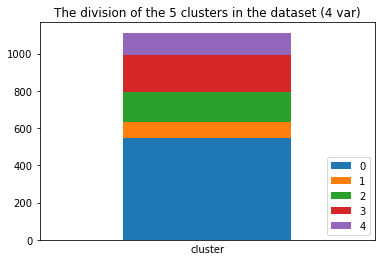

In [16]:
df_4var_den.assign(dummy = 1).groupby(['dummy','cluster']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.xlabel('cluster')
plt.xticks([])

#ho messo legend automatica tramite il parametro per verificare meglio, altrimenti vanno a caso
plt.legend(bins4var5c,loc='lower right')
plt.title('The division of the 5 clusters in the dataset (4 var)')

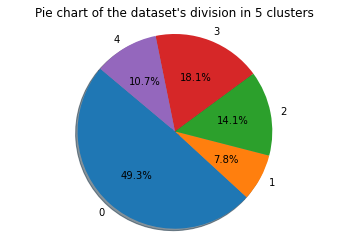

In [17]:
# Data to plot
labels = df_clusters.index
sizes = df_clusters['freq']
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'burlywood']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot 
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Pie chart of the dataset's division in 5 clusters")
plt.axis('equal')
plt.autumn()
plt.show()

#### Creiamo i dataset divisi per cluster con le rispettive var e mostriamo le informazioni su media, ecc.

In [18]:
df_cluster0 = df_4var_den[df_4var_den['cluster']==0]
df_cluster0.describe()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
count,548.000000,548.000000,548.000000,548.000000,548.0
mean,4.815693,1.990876,0.711679,1.974453,0.0
std,3.442498,1.657598,0.923436,1.687486,0.0
min,1.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.0
50%,4.000000,2.000000,0.000000,2.000000,0.0
75%,8.000000,3.000000,1.000000,3.000000,0.0
max,12.000000,8.000000,5.000000,9.000000,0.0


In [19]:
df_cluster1 = df_4var_den[df_4var_den['cluster']==1]
df_cluster1.describe()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
count,87.000000,87.000000,87.000000,87.000000,87.0
mean,21.862069,7.793103,4.356322,7.620690,1.0
std,4.396543,2.702875,3.437065,2.668687,0.0
min,14.000000,0.000000,0.000000,0.000000,1.0
25%,18.000000,7.000000,1.000000,7.000000,1.0
50%,22.000000,7.000000,4.000000,7.000000,1.0
75%,25.500000,9.000000,7.000000,9.000000,1.0
max,29.000000,17.000000,15.000000,17.000000,1.0


In [20]:
df_cluster2 = df_4var_den[df_4var_den['cluster']==2]
df_cluster2.describe()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
count,157.000000,157.000000,157.000000,157.000000,157.0
mean,5.617834,8.095541,1.554140,8.439490,2.0
std,3.701239,2.500727,1.630616,2.562895,0.0
min,1.000000,0.000000,0.000000,0.000000,2.0
25%,2.000000,7.000000,0.000000,7.000000,2.0
50%,6.000000,7.000000,1.000000,8.000000,2.0
75%,9.000000,9.000000,3.000000,10.000000,2.0
max,15.000000,16.000000,5.000000,17.000000,2.0


In [21]:
df_cluster3 = df_4var_den[df_4var_den['cluster']==3]
df_cluster3.describe()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
count,201.000000,201.000000,201.000000,201.000000,201.0
mean,20.691542,2.144279,0.656716,1.940299,3.0
std,4.860492,1.847723,0.875538,1.834780,0.0
min,13.000000,0.000000,0.000000,0.000000,3.0
25%,16.000000,0.000000,0.000000,0.000000,3.0
50%,20.000000,2.000000,0.000000,2.000000,3.0
75%,25.000000,3.000000,1.000000,3.000000,3.0
max,29.000000,8.000000,4.000000,9.000000,3.0


In [22]:
df_cluster4 = df_4var_den[df_4var_den['cluster']==4]
df_cluster4.describe()

,DistanceFromHome,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
count,119.000000,119.000000,119.000000,119.000000,119.0
mean,5.302521,7.773109,8.151261,7.084034,4.0
std,3.902530,3.187467,2.546645,2.956119,0.0
min,1.000000,0.000000,4.000000,0.000000,4.0
25%,2.000000,7.000000,7.000000,6.000000,4.0
50%,4.000000,8.000000,7.000000,7.000000,4.0
75%,8.000000,9.000000,9.000000,8.000000,4.0
max,15.000000,17.000000,15.000000,17.000000,4.0


#### Grafici per lo studio delle var per cluster

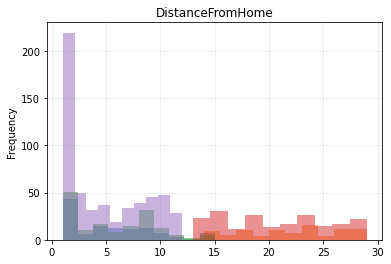

In [23]:
#DistanceFromHome con istogramma opacizzato

df_cluster4['DistanceFromHome'].hist(alpha=0.5)
df_cluster1['DistanceFromHome'].hist(alpha=0.5)
df_cluster2['DistanceFromHome'].hist(alpha=0.5)
df_cluster3['DistanceFromHome'].hist(alpha=0.5)
df_cluster0['DistanceFromHome'].hist(alpha=0.5)

plt.ylabel('Frequency')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.title('DistanceFromHome') 
plt.show()

Text(0.5, 1.0, 'Density of DistanceFromHome')

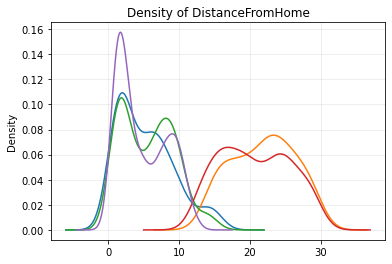

In [24]:
#DistanceFromHome con la densità

df_cluster4['DistanceFromHome'].plot(kind='kde')
df_cluster1['DistanceFromHome'].plot(kind='kde')
df_cluster2['DistanceFromHome'].plot(kind='kde')
df_cluster3['DistanceFromHome'].plot(kind='kde')
df_cluster0['DistanceFromHome'].plot(kind='kde')

plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.title('Density of DistanceFromHome') 

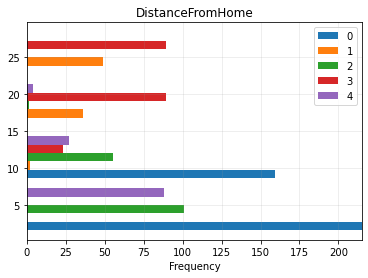

In [45]:
#istogramma per la var DistanceFromHome
xmin = 0
xmax = 350

plt.hist([df_cluster0['DistanceFromHome'], df_cluster1['DistanceFromHome'],
          df_cluster2['DistanceFromHome'],
        df_cluster3['DistanceFromHome'], df_cluster4['DistanceFromHome']], bins=4, orientation='horizontal')

#plt.xscale("log")
plt.legend(bins4var5c,loc='upper right')
plt.xlim(0, 215)
plt.xlabel('Frequency')
plt.title('DistanceFromHome')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

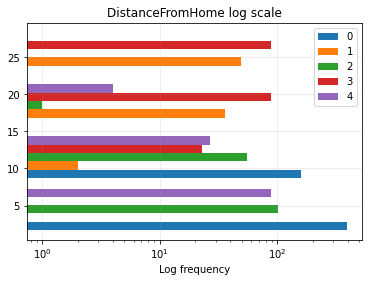

In [57]:
#istogramma per la var DistanceFromHome
xmin = 0
xmax = 350

plt.hist([df_cluster0['DistanceFromHome'], df_cluster1['DistanceFromHome'],
          df_cluster2['DistanceFromHome'],
        df_cluster3['DistanceFromHome'], df_cluster4['DistanceFromHome']], bins=4, orientation='horizontal')

plt.xscale("log")
plt.legend(bins4var5c,loc='upper right')
#plt.xlim(0, 215)
plt.xlabel('Log frequency')
plt.title('DistanceFromHome log scale')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

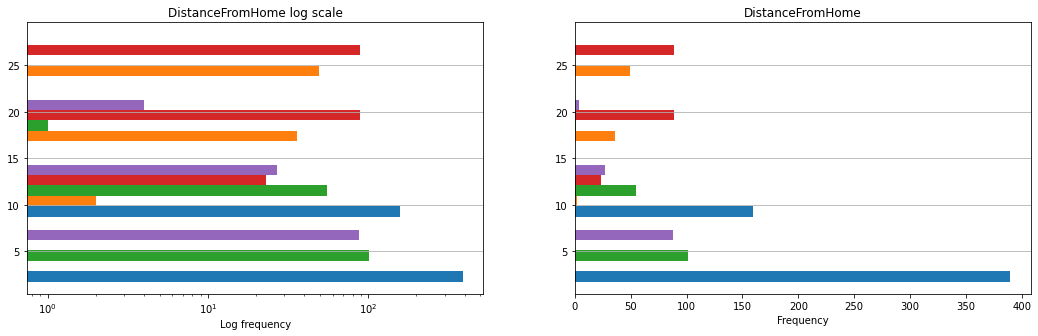

In [48]:
#DailyRate - Numerica Discreta - Histogram
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  #ANDRE: Per mettere più grafici accanto! Poi invece di plt.hist si usa axs[n].hist


axs[0].hist([df_cluster0['DistanceFromHome'], df_cluster1['DistanceFromHome'],
          df_cluster2['DistanceFromHome'],
        df_cluster3['DistanceFromHome'], df_cluster4['DistanceFromHome']], bins=4, orientation='horizontal')
axs[0].set_xscale("log")
axs[0].set_xlabel('Log frequency')
axs[0].title.set_text('DistanceFromHome log scale')

axs[1].hist([df_cluster0['DistanceFromHome'], df_cluster1['DistanceFromHome'],
          df_cluster2['DistanceFromHome'],
        df_cluster3['DistanceFromHome'], df_cluster4['DistanceFromHome']], bins=4, orientation='horizontal')
axs[1].set_xlabel('Frequency')
axs[1].title.set_text('DistanceFromHome')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

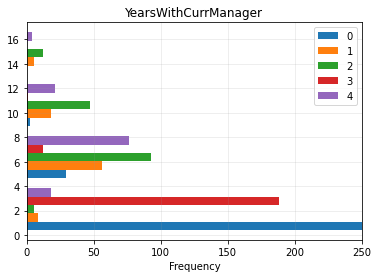

In [49]:
#istogramma per la var YearsWithCurrManager

xmin = 0
xmax = 350

plt.hist([df_cluster0['YearsWithCurrManager'], df_cluster1['YearsWithCurrManager'],
          df_cluster2['YearsWithCurrManager'],
        df_cluster3['YearsWithCurrManager'], df_cluster4['YearsWithCurrManager']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
plt.xlim(0, 250)
plt.xlabel('Frequency')
#plt.figure(figsize=(20,20))
plt.title('YearsWithCurrManager') 
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

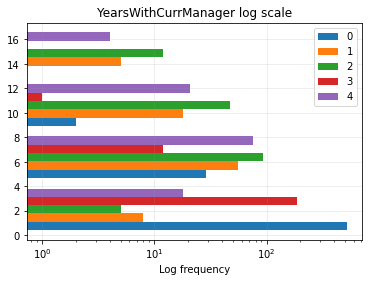

In [56]:
#istogramma per la var YearsWithCurrManager

xmin = 0
xmax = 350

plt.hist([df_cluster0['YearsWithCurrManager'], df_cluster1['YearsWithCurrManager'],
          df_cluster2['YearsWithCurrManager'],
        df_cluster3['YearsWithCurrManager'], df_cluster4['YearsWithCurrManager']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
#plt.xlim(0, 250)
plt.xscale("log")
plt.xlabel('Log frequency')
#plt.figure(figsize=(20,20))
plt.title('YearsWithCurrManager log scale') 
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

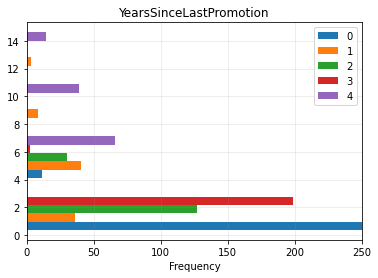

In [51]:
#istogramma per la var YearsSinceLastPromotion

xmin = 0
xmax = 350

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist([df_cluster0['YearsSinceLastPromotion'], df_cluster1['YearsSinceLastPromotion'],
          df_cluster2['YearsSinceLastPromotion'],
        df_cluster3['YearsSinceLastPromotion'], df_cluster4['YearsSinceLastPromotion']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
plt.xlim(0, 250)
plt.xlabel('Frequency')
plt.title('YearsSinceLastPromotion') 
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

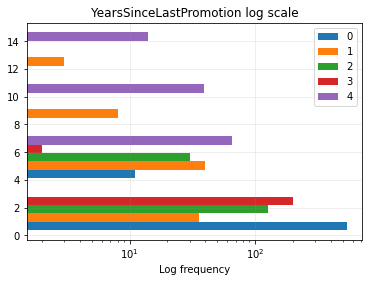

In [55]:
#istogramma per la var YearsSinceLastPromotion

xmin = 0
xmax = 350

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist([df_cluster0['YearsSinceLastPromotion'], df_cluster1['YearsSinceLastPromotion'],
          df_cluster2['YearsSinceLastPromotion'],
        df_cluster3['YearsSinceLastPromotion'], df_cluster4['YearsSinceLastPromotion']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
#plt.xlim(0, 250)
plt.xscale("log")
plt.xlabel('Log frequency')
plt.title('YearsSinceLastPromotion log scale') 
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

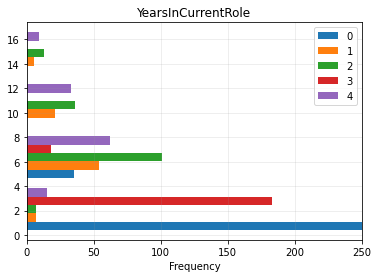

In [28]:
#istogramma per la var YearsInCurrentRole

xmin = 0
xmax = 350

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist([df_cluster0['YearsInCurrentRole'], df_cluster1['YearsInCurrentRole'],
          df_cluster2['YearsInCurrentRole'],
        df_cluster3['YearsInCurrentRole'], df_cluster4['YearsInCurrentRole']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
plt.xlim(0, 250)
plt.xlabel('Frequency')
plt.title('YearsInCurrentRole')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

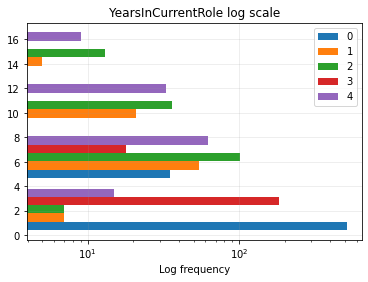

In [54]:
#istogramma per la var YearsInCurrentRole

xmin = 0
xmax = 350

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist([df_cluster0['YearsInCurrentRole'], df_cluster1['YearsInCurrentRole'],
          df_cluster2['YearsInCurrentRole'],
        df_cluster3['YearsInCurrentRole'], df_cluster4['YearsInCurrentRole']], bins=4, orientation='horizontal')

plt.legend(bins4var5c,loc='upper right')
#plt.xlim(0, 250)
plt.xscale("log")
plt.xlabel('Log frequency')
plt.title('YearsInCurrentRole log scale')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [30]:
#Per vedere il valore massimo delle variabili nel cluster 3

print("YSLP c0", len(df_cluster0[df_cluster0["YearsInCurrentRole"]<=4]))
print("YICR c0", len(df_cluster0[df_cluster0["YearsSinceLastPromotion"]<=5]))
print("YWCM c0", len(df_cluster0[df_cluster0["YearsWithCurrManager"]<=5]))
print("DFH c0", len(df_cluster0[df_cluster0["DistanceFromHome"]<=7]))

YSLP c0 513
YICR c0 548
YWCM c0 529
DFH c0 389


#### Grafico sui centroidi delle 4 var

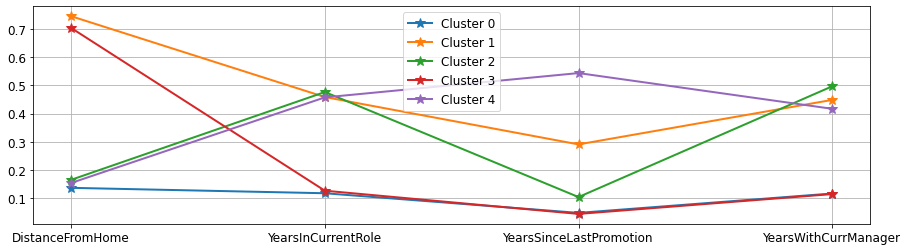

In [58]:
#creo il grafico per visualizzare i centroidi dei clusters di ciascuna delle 4 var
centers2 = kmeans4var5c.cluster_centers_
plt.figure(figsize=(15, 4))

for i in range(0, len(centers2)):
    plt.plot(centers2[i], marker='*', label='Cluster %s' % i, linewidth=2, markersize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(range(0, len(df_4var.columns)), df_4var.columns, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

This is the analysis of the k centroids

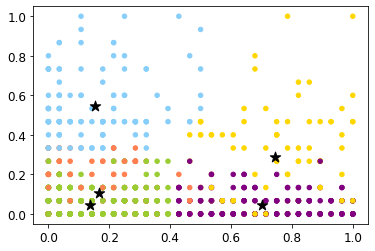

In [61]:
#scatterplot con i clusters di DistanceFromHome e YearsSinceLastPromotion
newcolors = matplotlib.colors.ListedColormap(["yellowgreen", "gold", "coral", "purple", "lightskyblue"])
plt.scatter(df_4var['DistanceFromHome'], df_4var['YearsSinceLastPromotion'], 
            c=kmeans4var5c.labels_, s=20, cmap = newcolors)
plt.scatter(centers2[:, 0], centers2[:, 2], s=120, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Should we show also the scattermatrix? I don't think it's necessary (Aria), but here it is:

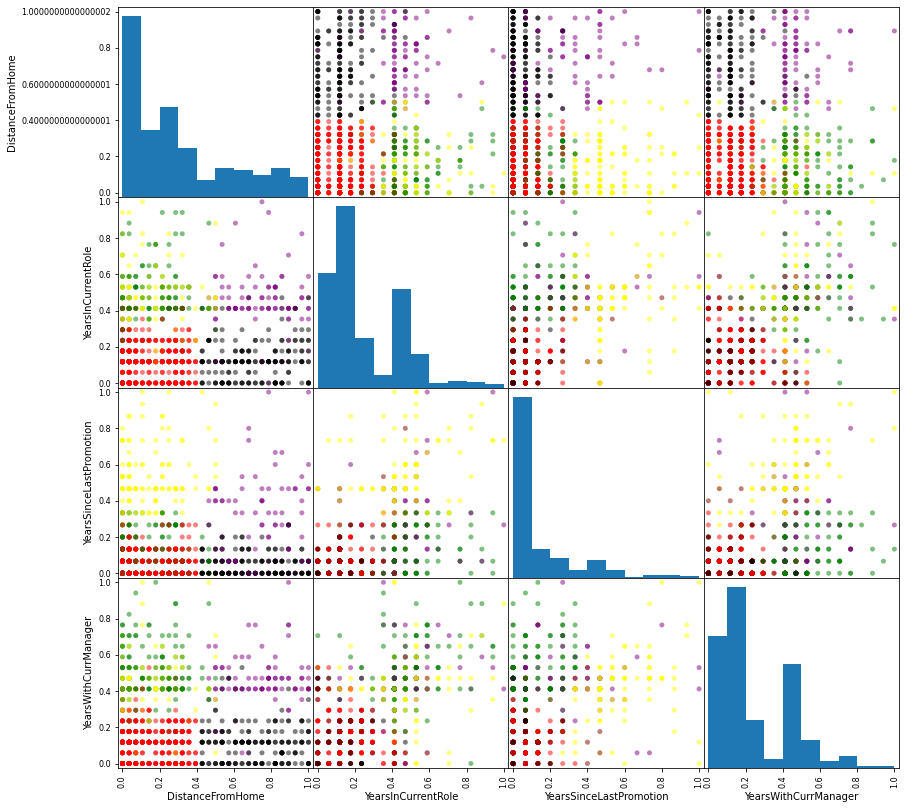

In [62]:
#ARIA: ho cambiato i colori per rendere i clusters più visibili
newcmap = matplotlib.colors.ListedColormap(["red", "purple", "green", "black", "yellow"])
scatter_matrix4var5c = scatter_matrix(df_4var, figsize=(14, 14), c=kmeans4var5c.labels_, s=100, cmap = newcmap)
#creazione di un'altra matrice con gli scatterplot delle 4 variabili

for ax in scatter_matrix4var5c.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

### APPLICO K-MEANS CON n_clusters=6 e n_init=20 SUL DATASET CON 4 VAR

In [66]:
#n_clusters 6 con il dataset con 4 variabili
kmeans4var6c = KMeans(n_clusters= 6, n_init= 20, max_iter=100)
kmeans4var6c.fit(matrix4var)

KMeans(max_iter=100, n_clusters=6, n_init=20)

In [67]:
hist4var6c, bins4var6c = np.histogram(kmeans4var6c.labels_, bins=range(0, len(set(kmeans4var6c.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins4var6c, hist4var6c)))
print ('sse', kmeans4var6c.inertia_)
print ('silhouette', silhouette_score(df_4var, kmeans4var6c.labels_))

labels {0: 88, 1: 248, 2: 118, 3: 147, 4: 355, 5: 156}
sse 59.77502415719121
silhouette 0.32715238250347295


The silhouette now is 0.3 >> I prefer k=5 (Aria)

In [68]:
centers3 = kmeans4var6c.cluster_centers_
centers3 #visualizzo i centroidi

array([[0.74391234, 0.45454545, 0.28939394, 0.44786096],
       [0.32978111, 0.1193074 , 0.04973118, 0.11266603],
       [0.15254237, 0.45912263, 0.5440678 , 0.41974078],
       [0.78109815, 0.12605042, 0.04036281, 0.1092437 ],
       [0.05452716, 0.11814416, 0.04807512, 0.11946976],
       [0.16414835, 0.47662142, 0.1025641 , 0.4984917 ]])

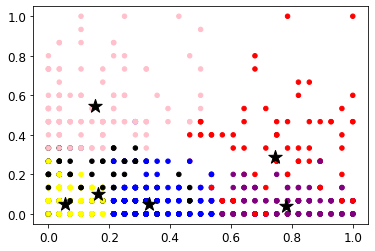

In [69]:
#scatterplot con i clusters di DistanceFromHome e YearsSinceLastPromotion
colors = matplotlib.colors.ListedColormap(["red", "blue", "pink", "purple", "yellow", "black"])
plt.scatter(df_4var['DistanceFromHome'], df_4var['YearsSinceLastPromotion'], 
            c=kmeans4var6c.labels_, s=20, cmap = colors)
plt.scatter(centers3[:, 0], centers3[:, 2], s=200, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### APPLICO K-MEANS CON n_clusters=8 e n_init=20 SUL DATASET CON 4 VAR

In [70]:
#n_clusters 8 con il dataset con 4 variabili
kmeans4var8c = KMeans(n_clusters= 8, n_init= 20, max_iter=100)
kmeans4var8c.fit(matrix4var)

KMeans(max_iter=100, n_init=20)

In [71]:
hist4var8c, bins4var8c = np.histogram(kmeans4var8c.labels_, bins=range(0, len(set(kmeans4var8c.labels_)) + 1))
#print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins4var8c, hist4var8c)))
print ('sse', kmeans4var8c.inertia_)
print ('silhouette', silhouette_score(df_4var, kmeans4var8c.labels_))

labels {0: 242, 1: 52, 2: 344, 3: 35, 4: 96, 5: 148, 6: 116, 7: 79}
sse 52.14006257699034
silhouette 0.3258636591433795


SSE is better, but the silhouette is always too low... don't like it either (Aria).

In [72]:
centers4 = kmeans4var8c.cluster_centers_
centers4 #visualizzo i centroidi

array([[0.33028335, 0.1137579 , 0.04683196, 0.11035489],
       [0.14491758, 0.62217195, 0.21025641, 0.63914027],
       [0.05481728, 0.11645007, 0.04844961, 0.11080711],
       [0.2122449 , 0.5697479 , 0.77714286, 0.53109244],
       [0.16852679, 0.40625   , 0.43680556, 0.36151961],
       [0.78016409, 0.12599364, 0.04144144, 0.11128776],
       [0.16564039, 0.38539554, 0.04712644, 0.43154158],
       [0.76491863, 0.46016381, 0.27004219, 0.44601638]])

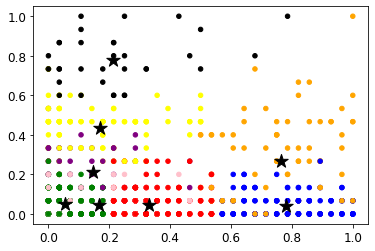

In [73]:
#scatterplot con i clusters di DistanceFromHome e YearsSinceLastPromotion
newnewcmap = matplotlib.colors.ListedColormap(["red", "purple", "green", "black", "yellow", "blue", "pink", "orange"])
plt.scatter(df_4var['DistanceFromHome'], df_4var['YearsSinceLastPromotion'], 
            c=kmeans4var8c.labels_, s=20, cmap=newnewcmap)
plt.scatter(centers4[:, 0], centers4[:, 2], s=200, marker='*', c='k') #giusto??
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

A bit too confused? Even though the division is pretty defined (what do you think?)

Let's see again also the scattermatrix: I changed colors to see the clusters, but it doesn't convince me.

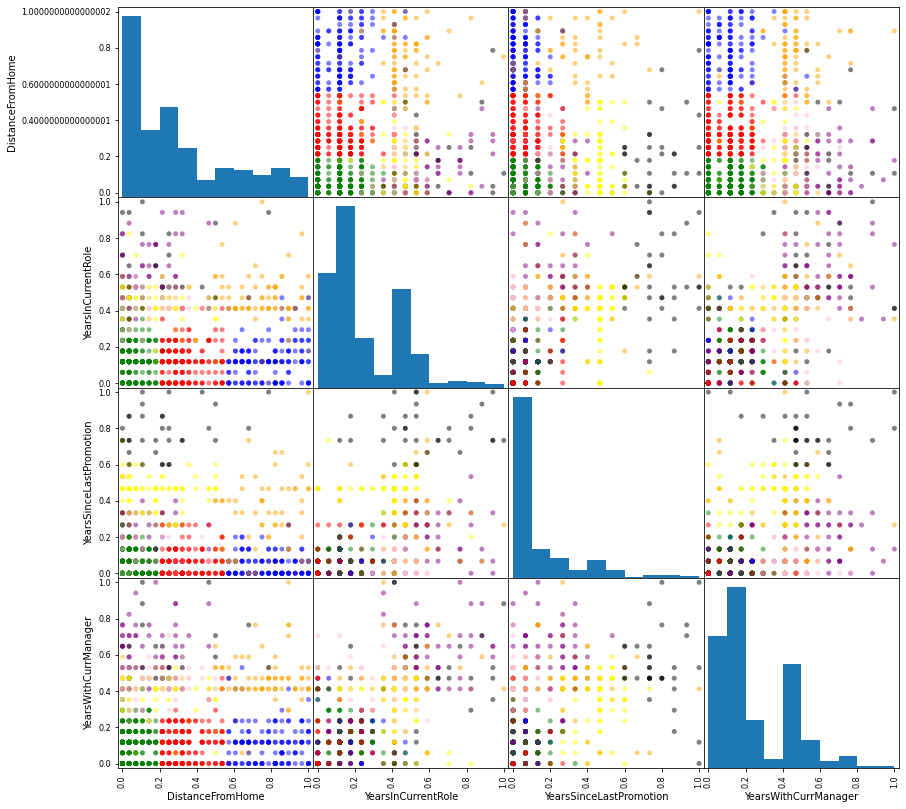

In [74]:
newcmap = matplotlib.colors.ListedColormap(["red", "purple", "green", "black", "yellow", "blue", "pink", "orange"])
scatter_matrix4var8c = scatter_matrix(df_4var, figsize=(14, 14), c=kmeans4var8c.labels_, s=100, cmap = newcmap)
#creazione di un'altra matrice con gli scatterplot delle 4 variabili

for ax in scatter_matrix4var8c.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

Non si vede almost un cazz*

I plot again the centroids, but the situation is always the same, more or less: we prefer DFH and YSLP.

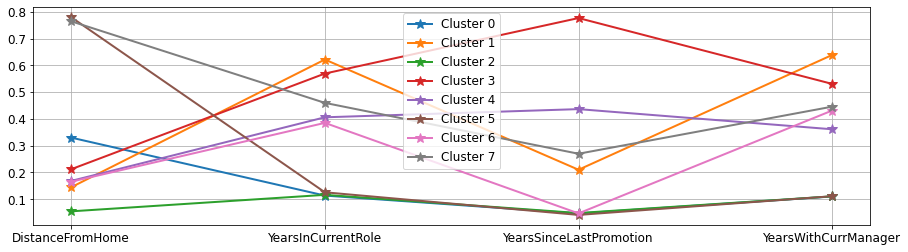

In [75]:
#creo il grafico per visualizzare i centroidi dei clusters di ciascuna delle 4 var
centers4var8c = kmeans4var8c.cluster_centers_
plt.figure(figsize=(15, 4))

for i in range(0, len(centers4var8c)):
    plt.plot(centers4var8c[i], marker='*', label='Cluster %s' % i, linewidth=2, markersize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(range(0, len(df_4var.columns)), df_4var.columns, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

From this analysis, I can say that I prefer the clustering with k=5 (Aria), so I would pick it and talk about it in the report, showing the scattermatrix (maybe?) and the scatterplot on DFH and YSLP (before vs after).